<a href="https://colab.research.google.com/github/NAMAANIRUDH2006/liver-cirrosis-care/blob/main/revolutionizing_liver_cirrosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle as pkl
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [ ]:
import pandas as pd
df = pd.read_excel('HealthCareData.xlsx')
df.head()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
1,2,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
2,3,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
3,4,55,male,rural,12,2,branded liquor,negative,negative,NO,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
4,5,55,female,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES


In [ ]:
df.shape

(950, 42)

In [ ]:
df.isnull().any()

,0
S.NO,False
Age,False
Gender,False
Place(location where the patient lives),True
Duration of alcohol consumption(years),False
Quantity of alcohol consumption (quarters/day),False
Type of alcohol consumed,False
Hepatitis B infection,False
Hepatitis C infection,False
Diabetes Result,False


In [ ]:
df.isnull().sum()

,0
S.NO,0
Age,0
Gender,0
Place(location where the patient lives),134
Duration of alcohol consumption(years),0
Quantity of alcohol consumption (quarters/day),0
Type of alcohol consumed,0
Hepatitis B infection,0
Hepatitis C infection,0
Diabetes Result,0


In [ ]:
categorical_features = df.select_dtypes(include=[object])
categorical_features.columns

Index(['Gender', 'Place(location where the patient lives)',
       'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)',
       'Obesity', 'Family history of cirrhosis/ hereditary', 'TG', 'LDL',
       'Total Bilirubin    (mg/dl)', 'A/G Ratio',
       'USG Abdomen (diffuse liver or  not)',
       'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'],
      dtype='object')

In [ ]:
df.describe()

,S.NO,Age,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),TCH,HDL,Hemoglobin (g/dl),PCV (%),RBC (million cells/microliter),MCV (femtoliters/cell),...,Basophils (%),Platelet Count (lakhs/mm),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L)
count,950.000000,950.000000,950.000000,950.000000,591.000000,582.000000,950.000000,920.000000,398.000000,941.000000,...,901.000000,950.000000,950.000000,895.000000,889.000000,941.000000,921.000000,940.000000,950.000000,950.000000
mean,475.500000,50.632632,20.606316,5.158947,197.544839,35.486254,10.263979,33.810000,3.390704,87.651435,...,0.498557,475.130042,4.040737,2.457542,5.590326,2.797131,3.245060,132.524468,81.794737,61.565263
std,274.385677,8.808272,7.980664,22.908785,26.694968,7.982057,1.942300,5.751592,0.937089,13.844181,...,0.712546,6515.406159,2.757443,1.093691,1.314308,2.198999,1.341187,27.462559,31.106923,31.306928
min,1.000000,32.000000,4.000000,1.000000,100.000000,25.000000,4.000000,12.000000,1.000000,60.000000,...,0.000000,0.520000,0.800000,0.200000,2.500000,0.900000,1.000000,56.000000,32.000000,23.000000
25%,238.250000,44.000000,15.000000,2.000000,180.000000,30.000000,9.000000,30.000000,2.825000,78.000000,...,0.000000,1.200000,2.700000,2.000000,4.800000,2.000000,2.500000,110.000000,59.000000,41.000000
50%,475.500000,50.000000,20.000000,2.000000,194.000000,35.000000,10.000000,35.000000,3.500000,87.000000,...,0.000000,1.420000,3.700000,2.300000,6.000000,2.500000,3.100000,130.000000,74.000000,49.000000
75%,712.750000,57.000000,26.000000,3.000000,210.000000,38.000000,11.500000,38.000000,4.000000,94.000000,...,1.000000,1.700000,4.200000,3.000000,6.400000,3.000000,4.000000,150.000000,96.000000,76.000000
max,950.000000,80.000000,45.000000,180.000000,296.000000,81.000000,15.900000,48.000000,5.700000,126.000000,...,4.000000,90000.000000,25.000000,6.600000,8.300000,22.000000,30.000000,206.000000,204.000000,216.000000


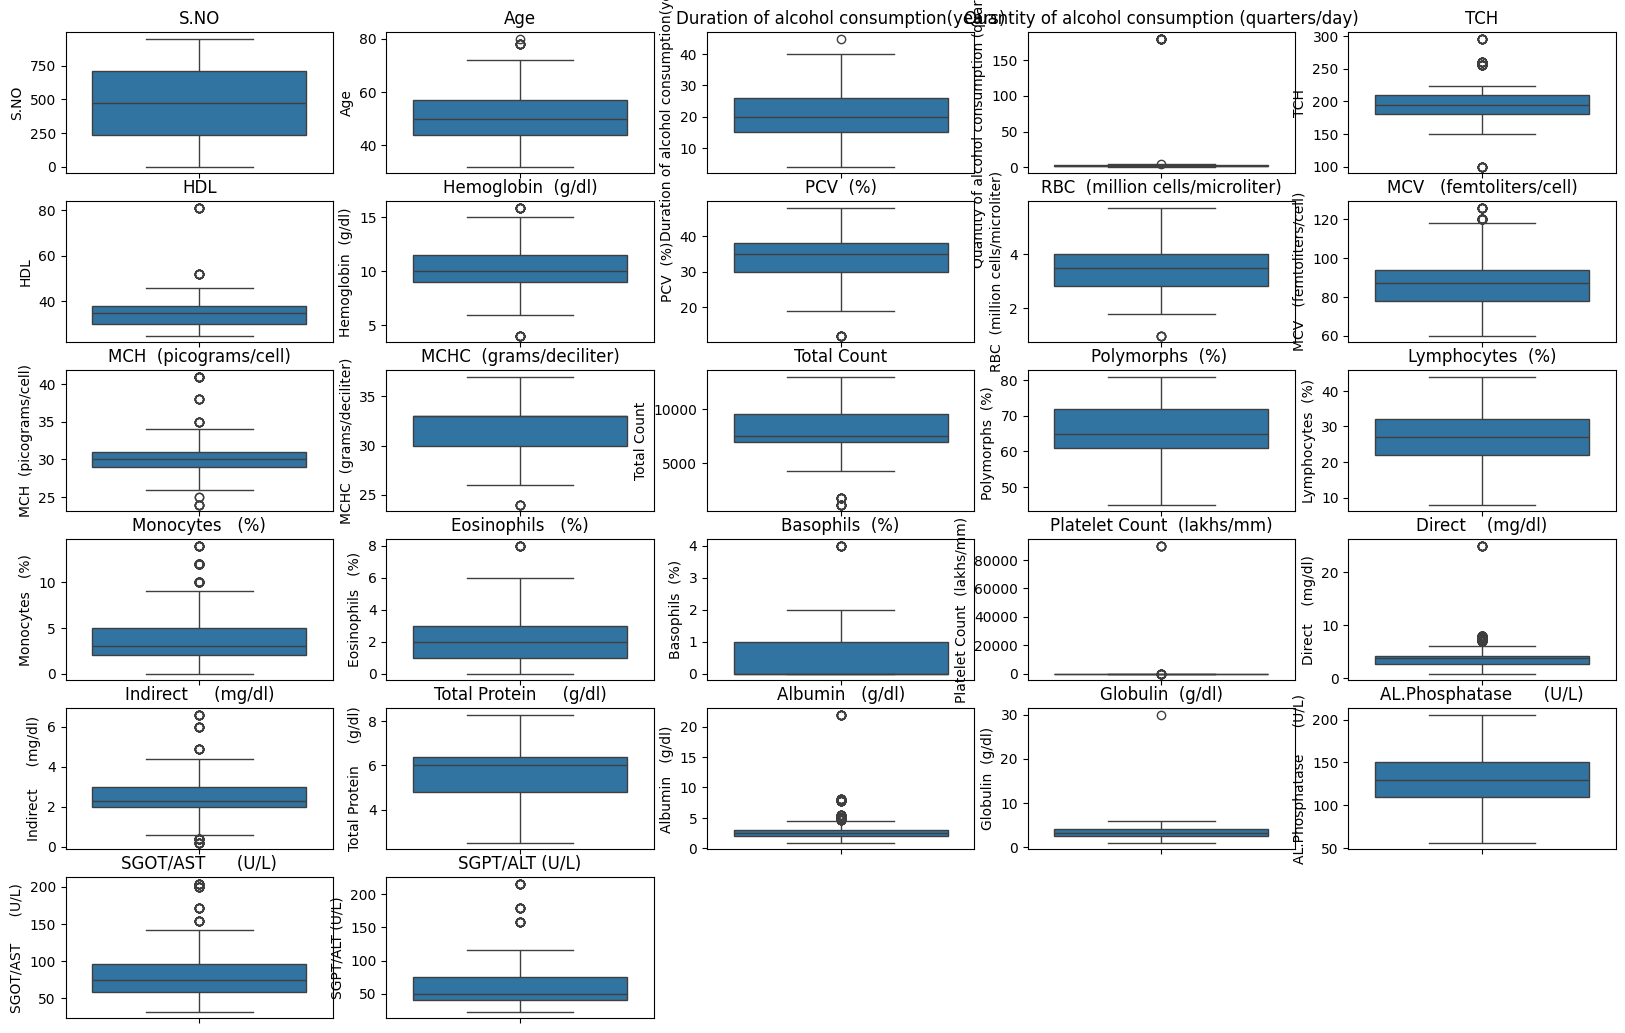

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Convert potentially numeric columns to numeric, coercing errors to NaN, excluding categorical columns
c = 0
plt.figure(figsize=(20, 15))
for i in df.columns:
    # Check if the column is numeric and not all values are NaN
    if df[i].dtype in ['int64', 'float64'] and not df[i].isnull().all():
        plt.subplot(7, 5, c+1)
        sns.boxplot(df[i])
        plt.title(i)
        c += 1
plt.show()

In [ ]:
import numpy as np

q1 = df['Eosinophils   (%)'].quantile(0.25)
q3 = df['Eosinophils   (%)'].quantile(0.75)
iqr = q3 - q1
q1,q3,iqr
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
lower_bound,upper_bound
df['Eosinophils   (%)'] = np.where(df['Eosinophils   (%)'] > upper_bound, upper_bound, np.where(df['Eosinophils   (%)'] < lower_bound , lower_bound , df['Eosinophils   (%)']))

<Axes: ylabel='Eosinophils   (%)'>

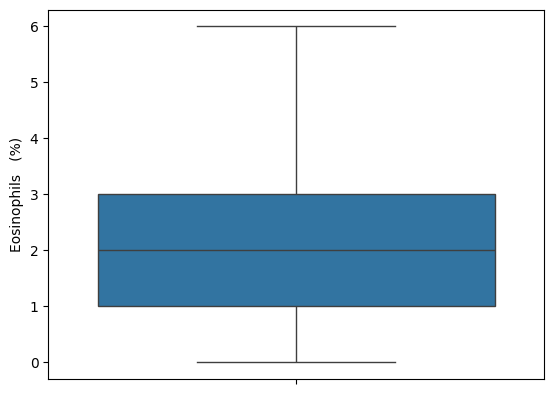

In [ ]:
sns.boxplot(df['Eosinophils   (%)'])

<Axes: ylabel='Basophils  (%)'>

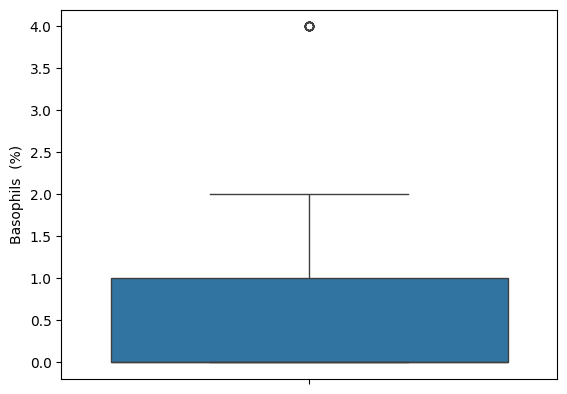

In [ ]:
sns.boxplot(df['Basophils  (%)'])

In [ ]:
q1 = df['Basophils  (%)'].quantile(0.25)
q3 = df['Basophils  (%)'].quantile(0.75)
iqr = q3 - q1
q1,q3,iqr
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
lower_bound,upper_bound
df['Basophils  (%)'] = np.where(df['Basophils  (%)'] > upper_bound, upper_bound, np.where(df['Basophils  (%)'] < lower_bound , lower_bound , df['Basophils  (%)']))

<Axes: ylabel='Basophils  (%)'>

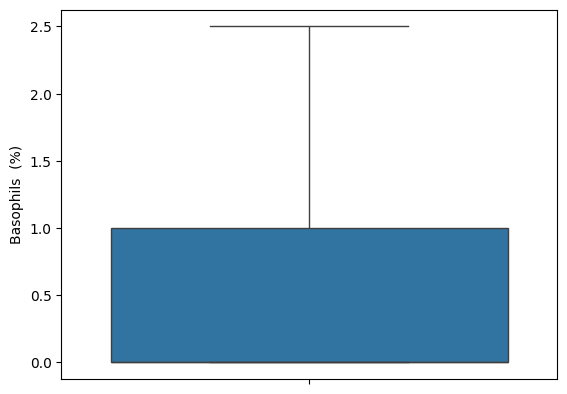

In [ ]:
sns.boxplot(df['Basophils  (%)'])

<Axes: ylabel='Platelet Count  (lakhs/mm)'>

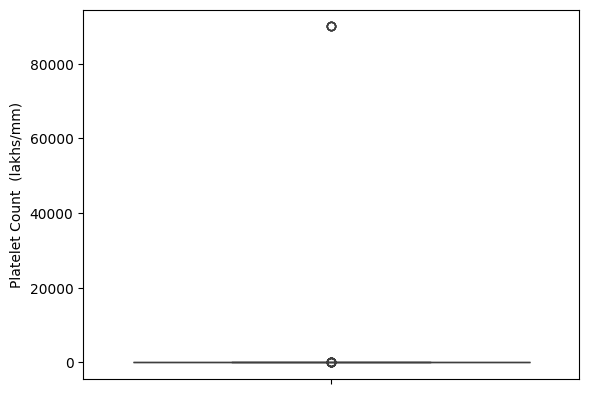

In [ ]:
sns.boxplot(df['Platelet Count  (lakhs/mm)'])

In [ ]:
df.describe()

,S.NO,Age,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),TCH,HDL,Hemoglobin (g/dl),PCV (%),RBC (million cells/microliter),MCV (femtoliters/cell),...,Basophils (%),Platelet Count (lakhs/mm),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L)
count,950.000000,950.000000,950.000000,950.000000,591.000000,582.000000,950.000000,920.000000,398.000000,941.000000,...,901.000000,950.000000,950.000000,895.000000,889.000000,941.000000,921.000000,940.000000,950.000000,950.000000
mean,475.500000,50.632632,20.606316,5.158947,197.544839,35.486254,10.263979,33.810000,3.390704,87.651435,...,0.481909,475.130042,4.040737,2.457542,5.590326,2.797131,3.245060,132.524468,81.794737,61.565263
std,274.385677,8.808272,7.980664,22.908785,26.694968,7.982057,1.942300,5.751592,0.937089,13.844181,...,0.644771,6515.406159,2.757443,1.093691,1.314308,2.198999,1.341187,27.462559,31.106923,31.306928
min,1.000000,32.000000,4.000000,1.000000,100.000000,25.000000,4.000000,12.000000,1.000000,60.000000,...,0.000000,0.520000,0.800000,0.200000,2.500000,0.900000,1.000000,56.000000,32.000000,23.000000
25%,238.250000,44.000000,15.000000,2.000000,180.000000,30.000000,9.000000,30.000000,2.825000,78.000000,...,0.000000,1.200000,2.700000,2.000000,4.800000,2.000000,2.500000,110.000000,59.000000,41.000000
50%,475.500000,50.000000,20.000000,2.000000,194.000000,35.000000,10.000000,35.000000,3.500000,87.000000,...,0.000000,1.420000,3.700000,2.300000,6.000000,2.500000,3.100000,130.000000,74.000000,49.000000
75%,712.750000,57.000000,26.000000,3.000000,210.000000,38.000000,11.500000,38.000000,4.000000,94.000000,...,1.000000,1.700000,4.200000,3.000000,6.400000,3.000000,4.000000,150.000000,96.000000,76.000000
max,950.000000,80.000000,45.000000,180.000000,296.000000,81.000000,15.900000,48.000000,5.700000,126.000000,...,2.500000,90000.000000,25.000000,6.600000,8.300000,22.000000,30.000000,206.000000,204.000000,216.000000


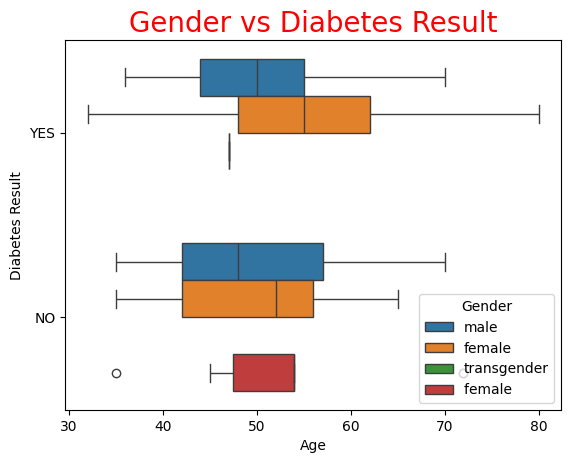

In [ ]:
sns.boxplot(x='Age',y='Diabetes Result',data=df,hue='Gender')
plt.title('Gender vs Diabetes Result',color='Red',size=20)
plt.show()

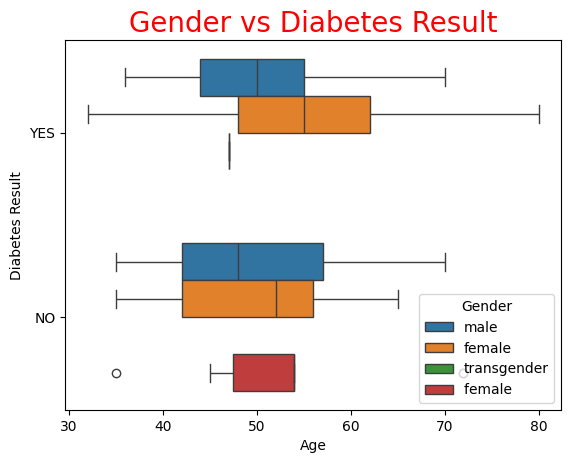

In [ ]:
sns.boxplot(x='Age',y='Diabetes Result',data=df,hue='Gender')
plt.title('Gender vs Diabetes Result',color='Red',size=20)
plt.show()

In [ ]:
df['Diabetes Result'].value_counts()

,count
Diabetes Result,
YES,647
NO,303


In [ ]:
# Drop the current 'Diabetes Result' column
df = df.drop('Diabetes Result', axis=1)

# Reload the original 'Diabetes Result' column from the Excel file
df_original = pd.read_excel('HealthCareData.xlsx')
df['Diabetes Result'] = df_original['Diabetes Result']

# Display the value counts of the 'Diabetes Result' column to verify
display(df['Diabetes Result'].value_counts())

,count
Diabetes Result,
YES,647
NO,303


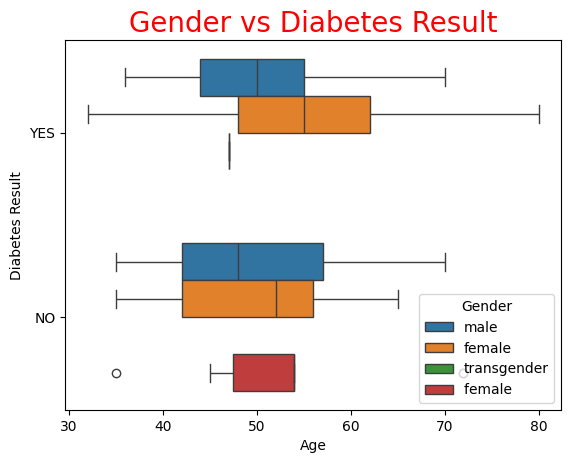

In [ ]:
sns.boxplot(x='Age',y='Diabetes Result',data=df,hue='Gender')
plt.title('Gender vs Diabetes Result',color='Red',size=20)
plt.show()

<Axes: xlabel='Place(location where the patient lives)', ylabel='Age'>

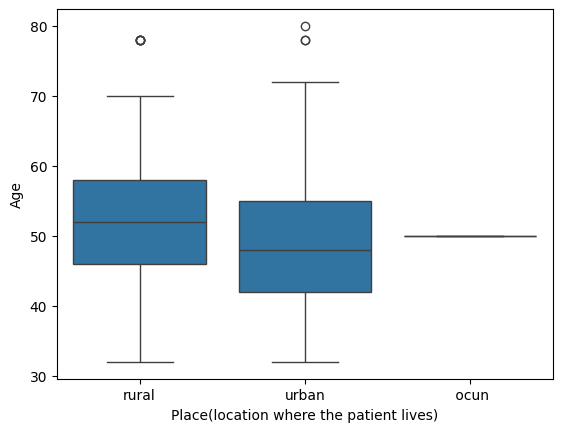

In [ ]:
sns.boxplot(x=df['Place(location where the patient lives)'],y=df['Age'])

NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

NameError: name 'x_train' is not defined

Before splitting the data, I'll handle the missing values and categorical features. I'll use the median for numerical features and the mode for categorical features to fill missing values. For categorical features, I'll use one-hot encoding.

In [ ]:
# Impute missing values in numerical columns with the median
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    if df[col].isnull().any():
        df[col].fillna(df[col].median(), inplace=True)

# Impute missing values in categorical columns with the mode
for col in df.select_dtypes(include=['object']).columns:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)

# Separate features (X) and target variable (y)
X = df.drop('Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)', axis=1)
y = df['Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)']

# Convert categorical features to dummy variables using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/tmp/ipython-input-6-273975725.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-6-273975725.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Now that the data is split and preprocessed, I can train the Naive Bayes model.

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
import pandas as pd
df = pd.read_excel('HealthCareData.xlsx')

In [ ]:
x_train

,S.NO,Age,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),TCH,HDL,Hemoglobin (g/dl),PCV (%),RBC (million cells/microliter),MCV (femtoliters/cell),...,A/G Ratio_1900-01-01 05:24:00,A/G Ratio_1900-01-01 06:24:00,A/G Ratio_0.42,A/G Ratio_0.44,A/G Ratio_0.86,A/G Ratio_0.48,A/G Ratio_1.18,A/G Ratio_1.68,A/G Ratio_1.8,USG Abdomen (diffuse liver or not)_no
936,937,72,4,3,194.0,35.0,12.30,42.0,5.2,84.0,...,False,False,False,False,False,False,False,False,False,True
290,291,52,12,1,180.0,35.0,10.20,42.0,3.5,92.0,...,False,False,False,False,False,False,False,False,False,False
544,545,38,24,3,194.0,35.0,8.00,34.0,5.0,82.0,...,False,False,False,False,False,False,False,False,False,False
275,276,60,10,3,175.0,38.0,10.50,37.0,3.5,72.0,...,False,False,False,False,False,False,False,False,False,False
109,110,50,15,1,182.0,35.0,9.90,36.0,3.5,90.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,54,20,2,100.0,30.0,9.00,35.0,3.5,80.0,...,False,False,False,False,False,False,False,False,False,False
270,271,60,10,3,175.0,38.0,9.70,37.0,3.5,72.0,...,False,False,False,False,False,False,False,False,False,False
860,861,57,25,3,176.0,36.0,11.00,40.0,3.5,72.0,...,False,False,False,True,False,False,False,False,False,False
435,436,55,20,2,194.0,35.0,9.29,34.0,3.8,120.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y_train

,Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
936,no
290,YES
544,YES
275,YES
109,YES
...,...
106,YES
270,YES
860,YES
435,YES


**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
x_train

,S.NO,Age,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),TCH,HDL,Hemoglobin (g/dl),PCV (%),RBC (million cells/microliter),MCV (femtoliters/cell),...,A/G Ratio_1900-01-01 05:24:00,A/G Ratio_1900-01-01 06:24:00,A/G Ratio_0.42,A/G Ratio_0.44,A/G Ratio_0.86,A/G Ratio_0.48,A/G Ratio_1.18,A/G Ratio_1.68,A/G Ratio_1.8,USG Abdomen (diffuse liver or not)_no
936,937,72,4,3,194.0,35.0,12.30,42.0,5.2,84.0,...,False,False,False,False,False,False,False,False,False,True
290,291,52,12,1,180.0,35.0,10.20,42.0,3.5,92.0,...,False,False,False,False,False,False,False,False,False,False
544,545,38,24,3,194.0,35.0,8.00,34.0,5.0,82.0,...,False,False,False,False,False,False,False,False,False,False
275,276,60,10,3,175.0,38.0,10.50,37.0,3.5,72.0,...,False,False,False,False,False,False,False,False,False,False
109,110,50,15,1,182.0,35.0,9.90,36.0,3.5,90.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,54,20,2,100.0,30.0,9.00,35.0,3.5,80.0,...,False,False,False,False,False,False,False,False,False,False
270,271,60,10,3,175.0,38.0,9.70,37.0,3.5,72.0,...,False,False,False,False,False,False,False,False,False,False
860,861,57,25,3,176.0,36.0,11.00,40.0,3.5,72.0,...,False,False,False,True,False,False,False,False,False,False
435,436,55,20,2,194.0,35.0,9.29,34.0,3.8,120.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y_train

,Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
936,no
290,YES
544,YES
275,YES
109,YES
...,...
106,YES
270,YES
860,YES
435,YES


**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
x_train

,S.NO,Age,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),TCH,HDL,Hemoglobin (g/dl),PCV (%),RBC (million cells/microliter),MCV (femtoliters/cell),...,A/G Ratio_1900-01-01 05:24:00,A/G Ratio_1900-01-01 06:24:00,A/G Ratio_0.42,A/G Ratio_0.44,A/G Ratio_0.86,A/G Ratio_0.48,A/G Ratio_1.18,A/G Ratio_1.68,A/G Ratio_1.8,USG Abdomen (diffuse liver or not)_no
936,937,72,4,3,194.0,35.0,12.30,42.0,5.2,84.0,...,False,False,False,False,False,False,False,False,False,True
290,291,52,12,1,180.0,35.0,10.20,42.0,3.5,92.0,...,False,False,False,False,False,False,False,False,False,False
544,545,38,24,3,194.0,35.0,8.00,34.0,5.0,82.0,...,False,False,False,False,False,False,False,False,False,False
275,276,60,10,3,175.0,38.0,10.50,37.0,3.5,72.0,...,False,False,False,False,False,False,False,False,False,False
109,110,50,15,1,182.0,35.0,9.90,36.0,3.5,90.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,54,20,2,100.0,30.0,9.00,35.0,3.5,80.0,...,False,False,False,False,False,False,False,False,False,False
270,271,60,10,3,175.0,38.0,9.70,37.0,3.5,72.0,...,False,False,False,False,False,False,False,False,False,False
860,861,57,25,3,176.0,36.0,11.00,40.0,3.5,72.0,...,False,False,False,True,False,False,False,False,False,False
435,436,55,20,2,194.0,35.0,9.29,34.0,3.8,120.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y_train

,Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
936,no
290,YES
544,YES
275,YES
109,YES
...,...
106,YES
270,YES
860,YES
435,YES


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
print('x_train',x_train)
print('y_train',y_train)

x_train      S.NO  Age  Duration of alcohol consumption(years)  \
936   937   72                                       4   
290   291   52                                      12   
544   545   38                                      24   
275   276   60                                      10   
109   110   50                                      15   
..    ...  ...                                     ...   
106   107   54                                      20   
270   271   60                                      10   
860   861   57                                      25   
435   436   55                                      20   
102   103   52                                      20   

     Quantity of alcohol consumption (quarters/day)    TCH   HDL  \
936                                               3  194.0  35.0   
290                                               1  180.0  35.0   
544                                               3  194.0  35.0   
275                    

**HYPER PARAMETER**

In [ ]:
from sklearn.model_selection import GridSearchCV,train_test_split,RandomizedSearchCV

In [ ]:
import numpy as np
k = np.random.randint(1,50,60)

In [ ]:
params = {'n_neighbors' : k}

In [ ]:
random_search = RandomizedSearchCV(estimator=knn,param_distributions=params,cv=10,n_jobs=-1,verbose=0)
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': array([ 8, 26, 31, 33, 17, 36, 36, 35, 46,  9, 49, 20, 48,  7, 38, 18, 31,
        6, 36, 12, 14, 40, 47, 15, 18, 30, 36, 13, 32, 27,  7, 36, 15, 42,
       32,  3, 27,  2, 46, 20,  2, 45,  5,  6, 24,  7,  6, 45, 12, 14, 41,
       30, 21,  6, 15, 47, 32, 20, 44, 46])})

In [ ]:
print('train_score - ' + str(random_search.score(x_train,y_train)))
print('test_score - ' + str(random_search.score(x_test,y_test)))

train_score - 1.0
test_score - 1.0
